> [Dune Python](https://arxiv.org/pdf/1807.05252.pdf) `v2.7` (va a estar deprecado) usaremos la `v.2.8.0`
$$
\nabla f=0
$$
Última actualización

In [35]:
!(date)

Sat Jul  3 04:02:01 PM -05 2021


```console
$ CONTENEDORID=xxxxxxxxxxxx
$ RUTA_ARCHIVO_EN_CONTENEDOR=/home/gitpod/Untitled.ipynb
$ RUTA_GUARDAR_EN_HOST=/tmp
$ docker cp $CONTENEDORID: $RUTA_ARCHIVO_EN_CONTENEDOR $RUTA_GUARDAR_EN_HOST
```

Ejemplo:
```
$ docker cp /tmp/notebook/Dune-python.ipynb 69817b157b9c:/home/gitpod
```

In [36]:
!(pacman -Qs dune)

local/dune-alugrid-git 4275.ed2f523d-1 (dune-extensions-git)
    Adaptive, loadbalancing, unstructured implementation of the DUNE grid
    interface supporting either simplices or cubes
local/dune-common-git 10834.71cedbcd4-1 (dune-core-git)
    Build system, infrastructure and foundation classes (git version)
local/dune-fem-git 12434.6ee2fcba3-1 (dune-extensions)
    A discretization module providing an implementation of mathematical
    abstractions to solve PDEs on parallel computers including local grid
    adaptivity, dynamic load balancing, and higher order discretization schemes
local/dune-geometry-git 1111.082238e-1 (dune-core-git)
    Geometry Transformations, Reference Elements and Quadrature Rules (git
    version)
local/dune-grid-git 11046.0908e9e54-1 (dune-core-git psurface-git)
    Grid Interface and Implementations (git version)
local/dune-istl-git 3372.6b1986f1-1 (dune-core-git)
    Iterative Solver Template Library (git version)
local/dune-localfunctions-git 1758.a3907

In [37]:
# https://www.tutorialspoint.com/Can-we-iteratively-import-python-modules-inside-a-for-loop
# https://stackoverflow.com/a/2050721
modules = [
    "common",
    "geometry",
    "grid",
    "istl",
    "localfunctions",
    "alugrid",
    "fem",
    "ufl",
    "create",
    "deprecate",
    "fenics",
    "generator",
    "models",
    "packagemetadata",
    "plotting",
    "source",
    "typeregistry",
    "utility",
    "polygongrid",
    "spgrid"
]
dune_modules = ["dune." + s for s in modules]
from importlib import import_module
for module in dune_modules:
    globals()[module] = import_module(module)

#### string `__file__`

In [38]:
print(f"{dir()}")

['FieldVector', 'In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'aluConformGrid', 'aluView', 'cartesianDomain', 'domain', 'dune.alugrid', 'dune.common', 'dune.create', 'dune.deprecate', 'dune.fem', 'dune.fenics', 'dune.generator', 'dune.geometry', 'dune.grid', 'dune.istl', 'dune.localfunctions', 'dune.models', 'dune.packagemetadata', 'dune.plotting', 'dune.polygongrid', 'dune.source', 'dune.spgrid', 'dune.typeregistry', 'dune.ufl', 'dune.utility', 'dune_modules', 'exit', 'geometryType', 'get_ipython', 'import_module', 'module', 'modules', 'p', 'quadratureRule', 'qu

In [39]:
#print(f"{__package__}\n{__file__}\n{__loader__}\n{__name__}\n{__spec__}")

In [40]:
from dune.common import FieldVector

In [41]:
x = FieldVector ([0.25, 0.25, 0.25])
print(x)

(0.250000, 0.250000, 0.250000)


In [42]:
from dune.geometry import simplex, referenceElement, quadratureRule

In [43]:
geometryType = simplex(2)
print(geometryType)
referenceElement = referenceElement(geometryType)

triangle


In [44]:
print("\t".join(str(c) for c in referenceElement.corners))

(0.000000, 0.000000)	(1.000000, 0.000000)	(0.000000, 1.000000)


In [45]:
for p in quadratureRule(geometryType, 3):
    print(p.position, p.weight)

(0.333333, 0.333333) -0.28125
(0.600000, 0.200000) 0.2604166666666667
(0.200000, 0.600000) 0.2604166666666667
(0.200000, 0.200000) 0.2604166666666667


In [46]:
from dune.grid import cartesianDomain, yaspGrid

In [47]:
!(pacman --version)


 .--.                  Pacman v6.0.0 - libalpm v13.0.0
/ _.-' .-.  .-.  .-.   Copyright (C) 2006-2021 Pacman Development Team
\  '-. '-'  '-'  '-'   Copyright (C) 2002-2006 Judd Vinet
 '--'
                       This program may be freely redistributed under
                       the terms of the GNU General Public License.



In [48]:
!(ls -l)

total 1076
-rw-r--r-- 1 gitpod gitpod    174 Jul  3 16:01 dgfparser.log
-rwxrwxrwx 1   1000   1000 596374 Jul  3 16:01 Dune-python.ipynb
-rw-r--r-- 1 gitpod gitpod  30075 Jul  3 14:32 sphere.dgf
-rw-r--r-- 1 gitpod gitpod 464993 Jul  3 15:55 Untitled.ipynb


In [49]:
!(cat /usr/lib/python3.9/site-packages/dune/grid/core.py)

from ._grid import reader
from .map import MultipleCodimMultipleGeomTypeMapper as Mapper

class CartesianDomain(tuple):
    def __new__ (cls, lower,upper,division,**parameters):
        dgf = "DGF\n"
        dgf += "INTERVAL\n"
        dgf += " ".join([str(x) for x in lower]) + "\n"
        dgf += " ".join([str(x) for x in upper]) + "\n"
        dgf += " ".join([str(x) for x in division]) + "\n"
        dgf += "#\n"
        dgf += "GRIDPARAMETER\n"
        for key in parameters:
            dgf += key + " " + str(parameters[key]) + "\n"
        dgf += "#\n"
        try:
            periodic = parameters["periodic"]
            if any(periodic):
                dgf += "PERIODICFACETRANSFORMATION\n"
                for i,p in enumerate(periodic):
                    if p:
                        dgf += "1 0, 0 1 + "
                        dgf += " ".join([str(upper[i]-lower[i]) if i==j
                            else "0" for j in range(len(lower))])
                        dgf += "\n"


In [50]:
domain = cartesianDomain([0, 0], [1, 0.25], [15, 4])

In [51]:
yaspView = yaspGrid(domain)

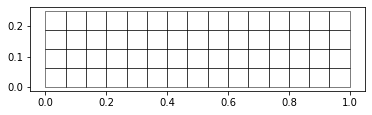

LeafGrid with 60 elements


In [52]:
yaspView.plot()
print(yaspView)

In [53]:
yaspView.hierarchicalGrid.globalRefine()

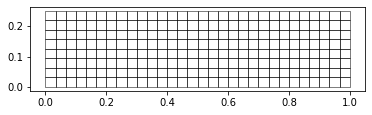

LeafGrid with 240 elements


In [54]:
yaspView.plot()
print(yaspView)

In [55]:
from dune.alugrid import aluConformGrid

In [56]:
aluView = aluConformGrid(domain)

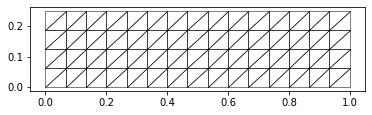

LeafGrid with 120 elements


In [57]:
aluView.plot()
print(aluView)

In [58]:
aluView.hierarchicalGrid.globalRefine()

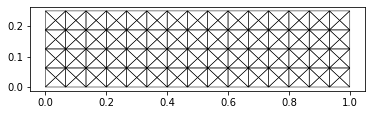

LeafGrid with 240 elements


In [59]:
aluView.plot()
print(aluView)

In [60]:
vertices = [
    (0, 0),
    (1, 0),
    (1, 0.6),
    (0, 0.6),
    (-1, 0.6),
    (-1, 0),
    (-1, -0.6),
    (0, -0.6)
]

In [61]:
triangles = [
    (2, 0, 1),
    (0, 2, 3),
    (4, 0, 3),
    (0, 4, 5),
    (6, 0, 5),
    (0, 6, 7)
]

In [62]:
aluView = aluConformGrid ({"vertices": vertices , "simplices": triangles})

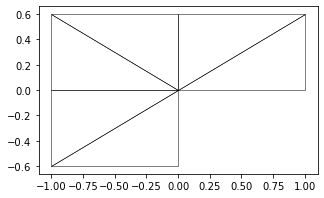

LeafGrid with 6 elements


In [63]:
aluView.plot(figsize=(5,5))
print(aluView)

In [64]:
aluView.hierarchicalGrid.globalRefine(2)

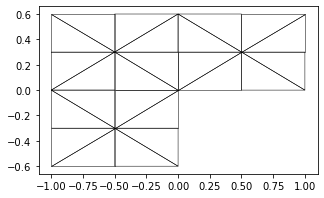

LeafGrid with 24 elements


In [65]:
aluView.plot(figsize=(5,5))
print(aluView)

In [66]:
from dune.grid import Marker

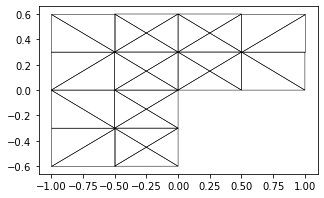

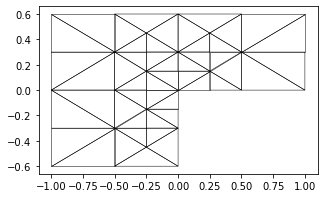

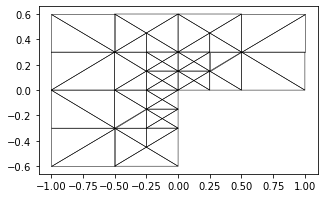

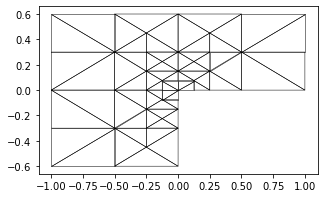

In [67]:
for i in range(1, 5):
    def mark(e):
        x = e.geometry.center
        return Marker.refine if x.two_norm < 0.64**i else Marker.keep
    aluView.hierarchicalGrid.adapt(mark)
    aluView.plot(figsize=(5,5))

In [68]:
from dune.alugrid import aluSimplexGrid

In [69]:
vertices = aluView.coordinates()
print(vertices)

[[ 0.     0.   ]
 [ 0.    -0.075]
 [-0.125 -0.075]
 [ 0.    -0.15 ]
 [-0.25  -0.15 ]
 [ 0.    -0.3  ]
 [-0.125 -0.225]
 [-0.25  -0.3  ]
 [-0.5   -0.3  ]
 [ 0.    -0.6  ]
 [-0.25  -0.45 ]
 [-0.5   -0.6  ]
 [-1.    -0.6  ]
 [-1.    -0.3  ]
 [-1.     0.   ]
 [-0.5    0.   ]
 [-0.25   0.   ]
 [-0.125  0.   ]
 [-0.125  0.075]
 [-0.25   0.15 ]
 [-0.5    0.3  ]
 [-1.     0.3  ]
 [-1.     0.6  ]
 [-0.5    0.6  ]
 [ 0.     0.6  ]
 [-0.25   0.45 ]
 [-0.25   0.3  ]
 [ 0.     0.3  ]
 [-0.125  0.225]
 [ 0.     0.15 ]
 [ 0.     0.075]
 [ 1.     0.6  ]
 [ 1.     0.3  ]
 [ 0.5    0.3  ]
 [ 1.     0.   ]
 [ 0.5    0.   ]
 [ 0.25   0.15 ]
 [ 0.25   0.   ]
 [ 0.125  0.075]
 [ 0.125  0.   ]
 [ 0.125  0.225]
 [ 0.25   0.3  ]
 [ 0.25   0.45 ]
 [ 0.5    0.6  ]]


In [70]:
triangles = [aluView.indexSet.subIndices(e, 2) for e in aluView.elements]
print(triangles)

DUNE-INFO: Compiling GridViewIndexSet


[(0, 1, 2), (1, 3, 2), (2, 3, 4), (3, 5, 6), (3, 6, 4), (4, 6, 7), (6, 5, 7), (4, 7, 8), (5, 9, 10), (5, 10, 7), (7, 10, 8), (8, 10, 11), (10, 9, 11), (8, 11, 12), (12, 13, 8), (13, 14, 8), (8, 14, 15), (8, 15, 4), (4, 15, 16), (4, 16, 2), (2, 16, 17), (2, 17, 0), (0, 17, 18), (17, 16, 18), (18, 16, 19), (16, 15, 19), (19, 15, 20), (15, 14, 20), (20, 14, 21), (20, 21, 22), (22, 23, 20), (23, 24, 25), (23, 25, 20), (20, 25, 26), (26, 25, 27), (25, 24, 27), (20, 26, 19), (26, 27, 28), (26, 28, 19), (19, 28, 29), (28, 27, 29), (19, 29, 18), (18, 29, 30), (18, 30, 0), (31, 32, 33), (32, 34, 33), (33, 34, 35), (33, 35, 36), (36, 35, 37), (36, 37, 38), (38, 37, 39), (38, 39, 0), (0, 30, 38), (30, 29, 38), (38, 29, 36), (29, 27, 40), (29, 40, 36), (36, 40, 41), (40, 27, 41), (36, 41, 33), (27, 24, 42), (27, 42, 41), (41, 42, 33), (33, 42, 43), (42, 24, 43), (33, 43, 31)]


In [71]:
aluView = aluSimplexGrid({"vertices": vertices, "simplices": triangles})
print(aluView)

DUNE-INFO: Compiling HierarchicalGrid


LeafGrid with 66 elements


In [72]:
vertices = [
    (0, 0),
    (1, 0),
    (1, 1),
    (0, 1)
]

In [73]:
triangles = [
    (2, 0, 1),
    (0, 2, 3)
]

In [74]:
unitSquare = aluSimplexGrid({"vertices": vertices , "simplices": triangles})

In [75]:
print(unitSquare.size(0), "elements and", unitSquare.size(2), "vertices")

2 elements and 4 vertices


In [76]:
for codim in range(0, unitSquare.dimension+1):
    for entity in unitSquare.entities(codim):
        print(", ".join(str(c) for c in entity.geometry.corners))

(1.000000, 1.000000), (1.000000, 0.000000), (0.000000, 0.000000)
(0.000000, 0.000000), (0.000000, 1.000000), (1.000000, 1.000000)
(0.000000, 0.000000), (1.000000, 0.000000)
(0.000000, 0.000000), (1.000000, 1.000000)
(0.000000, 0.000000), (0.000000, 1.000000)
(1.000000, 0.000000), (1.000000, 1.000000)
(1.000000, 1.000000), (0.000000, 1.000000)
(0.000000, 0.000000)
(1.000000, 0.000000)
(1.000000, 1.000000)
(0.000000, 1.000000)


In [77]:
for edge in unitSquare.edges:
    print(", ".join(str(c) for c in edge.geometry.corners))

(0.000000, 0.000000), (1.000000, 0.000000)
(0.000000, 0.000000), (1.000000, 1.000000)
(0.000000, 0.000000), (0.000000, 1.000000)
(1.000000, 0.000000), (1.000000, 1.000000)
(1.000000, 1.000000), (0.000000, 1.000000)


In [78]:
from dune.grid import gridFunction

In [79]:
from math import pi, cos

In [80]:
@gridFunction(aluView)
def f(x):
    return cos(2.*pi/(0.3+abs(x[0]*x[1])))

DUNE-INFO: Compiling Dune::ALUGrid< 2, 2, Dune::simplex, Dune::nonconforming >::LeafGridView::gf<0>


In [81]:
@gridFunction(aluView)
def hat0(element ,hatx):
    return 1-hatx[0]-hatx[1]

In [82]:
hatx = FieldVector([1./3., 1./3.])
print(hatx)

(0.333333, 0.333333)


In [83]:
maxValue = max(f(e, hatx) for e in f.grid.elements)
print(maxValue)

0.9982763964192582


In [84]:
maxValue = max(f(e.geometry.toGlobal(hatx)) for e in f.grid.elements)
print(maxValue)

0.9982763964192582


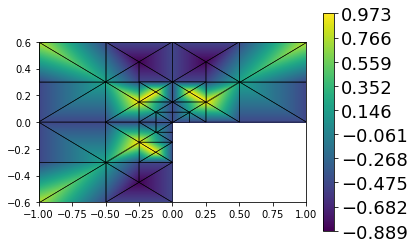

In [85]:
f.plot()

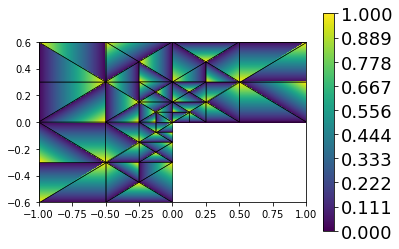

In [86]:
hat0.plot()

In [87]:
mapper = unitSquare.mapper([2, 0, 3])

DUNE-INFO: Compiling MultipleCodimMultipleGeomTypeMapper


In [88]:
from dune.geometry import quadrilateral, triangle

In [89]:
layout = {quadrilateral: 4, triangle: 1}

In [90]:
mapper = unitSquare.mapper(layout)

In [91]:
from dune.geometry import vertex

In [92]:
from numpy import zeros

In [93]:
def interpolate (grid):
    mapper = grid.mapper({vertex: 1})
    data = zeros(mapper.size)
    for v in grid.vertices:
        data[mapper.index(v)] = f(v.geometry.center)
    return mapper, data

In [94]:
mapper, data = interpolate(aluView)

In [95]:
@gridFunction(aluView)
def p12dEvaluate (e, x):
    bary = 1 - x[0] - x[1], x[0], x[1]
    idx = mapper. subIndices (e, 2)
    return sum(b * data[i] for b, i in zip(bary, idx))

In [96]:
@gridFunction(aluView)
def error(e, x):
    return abs(p12dEvaluate(e, x) - f(e, x))

In [97]:
hatx = FieldVector([1./3., 1./3.])

In [98]:
print(max(error(e, hatx) for e in aluView.elements))

1.6026566867981322


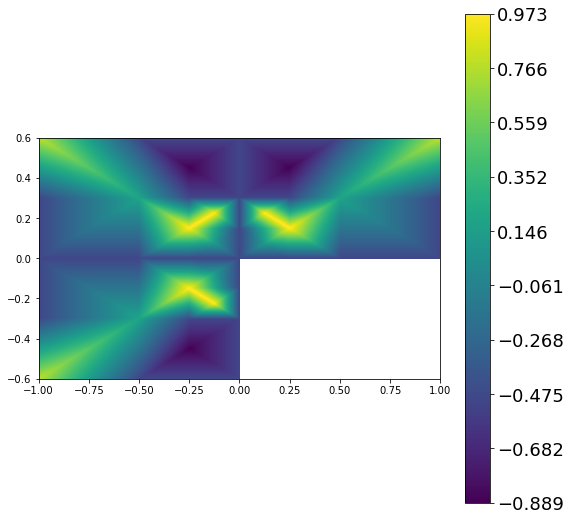

In [99]:
p12dEvaluate.plot(figsize=(9,9), gridLines=None)

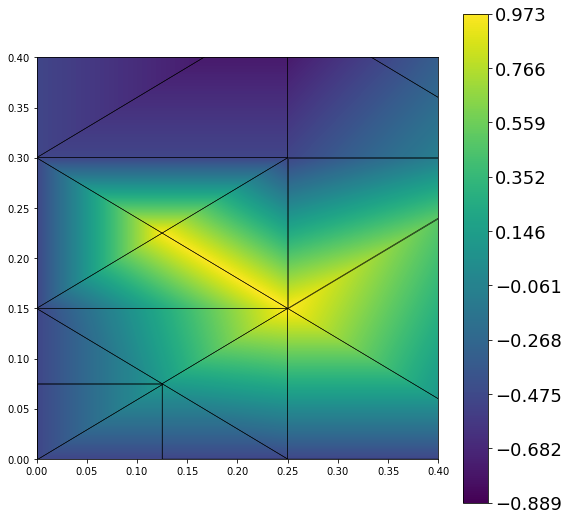

In [100]:
p12dEvaluate.plot(figsize=(9,9), gridLines='black', xlim=[0, 0.4], ylim=[0, 0.4])

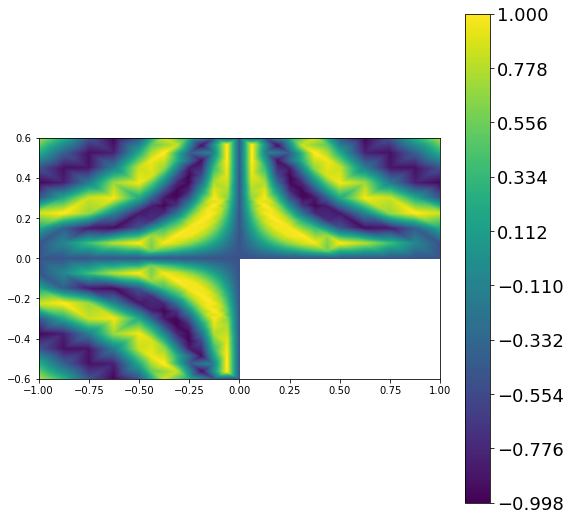

In [101]:
f.plot(level=2, figsize=(9,9), gridLines=None)

In [102]:
pd = {"exact": f, "discrete": p12dEvaluate, "error": error}

In [103]:
aluView.writeVTK("interpolation", pointdata=pd)

In [104]:
!(ls)

dgfparser.log  Dune-python.ipynb  interpolation.vtu  sphere.dgf  Untitled.ipynb


In [105]:
aluView.writeVTK("interpolation_subsampled", subsampling=2, pointdata=pd)

In [106]:
level = 3

In [107]:
!(ls)

dgfparser.log	   interpolation_subsampled.vtu  sphere.dgf
Dune-python.ipynb  interpolation.vtu		 Untitled.ipynb


In [108]:
triangulation = f.grid.triangulation(level)

In [109]:
z = f.pointData(level)[:,0]
print(z)

[0.17364818 0.66913061 0.96624927 ... 0.23575894 0.53889864 0.76604444]


In [110]:
!(pacman -Si mayavi)

Repository      : community
Name            : mayavi
Version         : 4.7.2-2
Description     : A 3-dimensional visualizer of scientific data
Architecture    : x86_64
URL             : https://github.com/enthought/mayavi
Licenses        : BSD
Groups          : None
Provides        : python-mayavi
Depends On      : vtk  python-envisage  python-traitsui  python-configobj
                  python-pyqt5  pdal  unixodbc  pugixml  openmpi  ffmpeg
                  python-numpy
Optional Deps   : None
Conflicts With  : None
Replaces        : python-mayavi
Download Size   : 16.80 MiB
Installed Size  : 30.69 MiB
Packager        : Felix Yan <felixonmars@archlinux.org>
Build Date      : Thu 12 Nov 2020 01:22:59 PM -05
Validated By    : MD5 Sum  SHA-256 Sum  Signature



In [111]:
#!(yay -Sy mayavi qt5-svg glew --needed --noconfirm)

In [112]:
#!(pacman -Q mayavi qt5-svg glew python-ipywidgets)

In [113]:
#!(jupyter nbextension install --py mayavi --user)

In [114]:
#!(jupyter nbextension enable --py mayavi --user)

In [115]:
#https://github.com/enthought/mayavi/issues/439
#https://www.gitmemory.com/issue/enthought/mayavi/1042/845950274
# Install make dependencies: https://archlinux.org/packages/community/x86_64/mayavi
#mlab.init_notebook()

In [116]:
for entity in aluView.interiorBorderPartition.elements:
    pass

In [117]:
from dune.grid import CommOp

In [118]:
mapper.communicate(aluView.interiorBorderPartition, aluView.allPartition, CommOp.set, data)

In [119]:
domain = cartesianDomain([0, 0], [1, 0.25], [15, 4])
print(domain)

(<reader.dgfString: 1>, 'DGF\nINTERVAL\n0 0\n1 0.25\n15 4\n#\nGRIDPARAMETER\n#\n')


In [120]:
yaspView = yaspGrid(domain)
print(yaspView)

LeafGrid with 60 elements


In [121]:
mapper = yaspView.mapper(lambda gt: gt.dim == 0)

DUNE-INFO: Compiling MultipleCodimMultipleGeomTypeMapper


In [122]:
data = zeros(mapper.size)
print(data)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [123]:
for e in yaspView.elements:
    data[mapper(e)] = yaspView.comm.rank*0.1

In [124]:
mapper.communicate(
    yaspView.interiorBorderPartition,
    yaspView.allPartition,
    lambda local, remote: min(local, remote),
    data)

In [125]:
# output the data together with the processor rank for visualization
@gridFunction(yaspView)
def p12dEvaluate(element, x):
    indices = mapper(element)
    bary = 1 - x[0] - x[1], x[0], x[1]
    return [sum(b*data[i] for b, i in zip(bary, indices)), yaspView.comm.rank, 0.]

DUNE-INFO: Compiling Dune::YaspGrid< 2, Dune::EquidistantOffsetCoordinates< double, 2 > >::LeafGridView::gf<3>


In [126]:
yaspView.writeVTK("communicate", pointdata={"rank": p12dEvaluate})

In [127]:
!(ls)

communicate.vtu    interpolation_subsampled.vtu  Untitled.ipynb
dgfparser.log	   interpolation.vtu
Dune-python.ipynb  sphere.dgf


In [128]:
from numpy import cos, pi

In [129]:
@gridFunction(aluView)
def function(x):
    return cos(2.*pi/(0.3 + abs(x[0]*x[1])))

In [130]:
aluView.hierarchicalGrid.globalRefine(4)

In [131]:
mapper, data = interpolate(aluView)

In [132]:
@gridFunction(aluView)
def p12dEvaluate(element ,x):
    indices = mapper(element)
    bary = 1 - x[0] - x[1], x[0], x[1]
    return sum(bary[i] * data[indices[i]] for i in range(3))

In [133]:
from numpy import abs

In [134]:
@gridFunction(aluView)
def error(element, x):
    return abs(p12dEvaluate(element, x) - function(element, x))

In [135]:
from time import time

In [136]:
from math import sqrt

In [137]:
start = time()
l2norm2 = 0
for e in aluView.elements:
    geo = e.geometry
    for p in quadratureRule(e.type, 5):
        hatx, hatw = p.position, p.weight
        weight = hatw * geo.integrationElement(hatx)
        l2norm2 += error(e,hatx)**2 * weight
print("L2 error of Lagrange interpolation:", sqrt(l2norm2))
print("time used:", round(time()-start, 2))

L2 error of Lagrange interpolation: 0.01933669460592616
time used: 5.16


In [142]:
from numpy import sum, fromiter

In [139]:
#?fromiter
# TODO: Emplear correctamente fromiter

In [143]:
start = time()
l2norm2 = 0
for e in aluView.elements:
    hatxs, hatws = quadratureRule(e.type, 5).get()
    weights = hatws * e.geometry.integrationElement(hatxs)
    l2norm2 += sum(error(e, hatxs)**2 * weights , axis=-1)
print("L2 error of Lagrange interpolation:", sqrt(l2norm2))
print("time used:", round(time() - start, 2))

<ipython-input-132-bb854b521133>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(bary[i] * data[indices[i]] for i in range(3))


L2 error of Lagrange interpolation: 0.01933669460592626
time used: 1.78


In [144]:
from dune.geometry import integrate, quadratureRules
start = time()
rules = quadratureRules(5)
l2norm2 = sum(integrate(rules, e, lambda e, x: error(e, x)**2) for e in aluView.elements)
print("One line approach:", sqrt(l2norm2))

print("time used:", round(time() - start, 2))

<ipython-input-144-3be68d836d59>:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  l2norm2 = sum(integrate(rules, e, lambda e, x: error(e, x)**2) for e in aluView.elements)
<ipython-input-132-bb854b521133>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(bary[i] * data[indices[i]] for i in range(3))


One line approach: 0.01933669460592626
time used: 1.87


In [145]:
#!(cat /usr/lib/python3.9/site-packages/dune/geometry/quadpy.py)

```python
import logging

logger = logging.getLogger(__name__)

try:
    import quadpy as qp
    import numpy
    class QPQuadPoint:
        def __init__(self,p,w):
            self.p_ = p
            self.w_ = w
        @property
        def position(self):
            return self.p_
        @property
        def weight(self):
            return self.w_
    _cache = {}
    class QPQuadPyQuadrature:
        def __init__(self,quad,order,method,vertices,transform):
            self.quad_ = quad
            self.order_ = order
            self.method_ = method
            self.vertices_ = numpy.array(vertices)
            # here an error will occur if the method is invalid - how to catch?
            self.quadrature_ = getattr(quad,method)
            try:
                self.points_ = transform.transform(self.quadrature_.points.T, self.vertices_)
            except ValueError:
                self.points_ = transform.transform(self.quadrature_.points.T, self.vertices_.T).T
            try:
                self.weights_ = transform.get_detJ(self.quadrature_.points.T, self.vertices_)*self.quadrature_.weights
            except AttributeError:
                self.weights_ = transform.get_vol(self.vertices_)*self.quadrature_.weights
            self.quadPoints_ = [ QPQuadPoint(p,w) for p,w in zip(self.points_,self.weights_) ]
            self.points_ = self.points_.transpose().copy()
        def get(self):
            return self.points_, self.weights_
        def apply(self,entity,f):
            ie = entity.geometry.integrationElement
            f_e = lambda x: f(entity,x)*ie(x)
            return self.quad_.integrate(f_e,self.vertices_,self.quadrature_)
        def __iter__(self):
            return self.quadPoints_.__iter__()
        @property
        def order(self):
            return self.quadrature_.degree
        def name(self):
            return self.method_
    def rule(gt,quadDescription):
        try:
            gt = gt.type
        except AttributeError:
            pass
        try:
            quad = _cache[(gt,quadDescription)]
            return quad
        except KeyError:
            pass
        order, method = quadDescription
        dim = gt.dim
        if gt.isLine:
            vertices = [0,1]
            quad = qp.line_segment
            from quadpy.ncube import transform
        elif gt.isTriangle:
            vertices = [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]]
            quad = qp.triangle
            from quadpy.nsimplex import transform
        elif gt.isQuadrilateral:
            vertices = qp.quadrilateral.rectangle_points([0.0, 1.0], [0.0, 1.0])
            quad = qp.quadrilateral
            from quadpy.ncube import transform
        elif gt.isTetrahedron:
            vertices = [[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
            quad = qp.tetrahedron
            from quadpy.nsimplex import transform
        elif gt.isHexahedron:
            vertices = qp.hexahedron.cube_points([0.0, 1.0], [0.0, 1.0], [0.0, 1.0])
            quad = qp.hexahedron
            from quadpy.ncube import transform
        elif gt.isPyramid:
            vertices = [[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [1.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
            quad = qp.pyramid
            raise ValueError("prism quadratures not yet fully supported")
        elif gt.isPrism:
            vertices = [
                [0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0],
                [0.0, 0.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0]
                       ]
            quad = qp.wedge
            raise ValueError("prism quadratures not yet fully supported")
        else:
            raise ValueError("no quadpy quadrature available for the geometryType " + str(gt))
        if not method and not order:
            return quad
        ret = QPQuadPyQuadrature(quad,order,method,vertices,transform)
        _cache[(gt,quadDescription)] = ret
        return ret

    def rules(methods):
        def r(entity):
            try:
                return rule(entity.type, methods[entity.type])
            except AttributeError:
                return rule(entity, methods[entity])
        return r

except ImportError as e:
    logger.warning('Unable to import quadpy: ' + " ".join(str(e).splitlines()))
    raise ImportError("Unable to import quadpy module")
```

In [146]:
#https://stackoverflow.com/a/8811418/9302545
#!(sudo pip install "quadpy>=0.11,<0.12.0")

In [147]:
#!(sudo pip uninstall -y quadpy)

In [148]:
#import quadpy
#qrules = quadpy.t2.schemes['xiao_gimbutas_05']

In [149]:
#import dune.geometry.quadpy as quadpy
#x = quadpy.rules({triangle: (5, "XiaoGimbutas")})
#print(x)

In [150]:
try:
    import dune.geometry.quadpy as quadpy
    start = time()
    qrules = quadpy.rules({triangle: (5, "XiaoGimbutas")})
    l2norm2 = sum(integrate(qrules, e, lambda e, x: error(e, x)**2) for e in aluView.elements)
    print("Using QuadPy:", sqrt(l2norm2))
    print("time used:", round(time() - start, 2))
except ImportError:
    pass

DUNE-WARNING: Unable to import quadpy: No module named 'quadpy'


In [151]:
from dune.generator import algorithm

In [152]:
#start = time()
#l2norm2 = algorithm.run('l2norm2a', 'l2norm2.hh', aluView , error)
#print("A: L2 error of Lagrange interpolation:", sqrt(l2norm2))
#print("time used:", round(time() - start, 2))

#start = time()
#l2norm2 = algorithm.run('l2norm2b', 'l2norm2.hh', aluView, rules, error)
#print("B: L2 error of Lagrange interpolation:", sqrt(l2norm2))
#print("time used:", round(time() - start,2))

In [153]:
#start = time()
#headers = ['l2norm2.hh', 'fulll2norm2.hh']
#l2norm2 = algorithm.run('l2norm2', headers, aluView, mapper, data)
#print("L2 error of Lagrange interpolation:", sqrt(l2norm2))
#print("time used:", round(time()-start, 2))

In [154]:
from dune.grid import CommOp

In [155]:
from dune.polygongrid import polygonGrid, voronoiDomain

In [156]:
#!(yay -Si dune-polygongrid-git)

In [157]:
#!(yay -S dune-polygongrid-git --noconfirm)

In [159]:
import numpy

In [160]:
boundingBox = numpy.array([[0, 0], [1, 1]])

In [161]:
view = polygonGrid(voronoiDomain(1513, boundingBox, seed=1234))

DUNE-INFO: Compiling HierarchicalGrid


In [163]:
from dune.grid import gridFunction

In [164]:
@gridFunction(view)
def c0(x):
    return 1.0 if x.two_norm > 0.125 and x.two_norm < 0.5 else 0.0

DUNE-INFO: Compiling Dune::PolygonGrid< double >::LeafGridView::gf<0>


In [165]:
class Bnd:
    def __init__(self, t):
        self.t = t
    def __call__(self, x):
        return c0(x -[self.t, self.t])

In [167]:
from matplotlib import pyplot

In [168]:
figure = pyplot.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

In [171]:
mapper = view.mapper(lambda gt: gt.dim == view.dimension)

DUNE-INFO: Compiling MultipleCodimMultipleGeomTypeMapper


In [173]:
c = initialize(view, mapper, c0)

NameError: name 'initialize' is not defined

```python
import numpy as np
import orthopy
import quadpy
print(f"QuadPy version:\t{quadpy.__version__}\nOrthoPy version:{orthopy.__version__}\nNumPy version:\t{np.__version__}")
scheme = quadpy.u3.get_good_scheme(19)
print(scheme)
scheme = quadpy.u3.get_good_scheme(19)
val = scheme.integrate(lambda x: np.exp(x[0]), [0.0, 0.0, 0.0], 1.0)
print(val)
#scheme = quadpy.t2.get_good_scheme(12)
scheme = quadpy.t2.schemes['xiao_gimbutas_05']()
print(scheme)
scheme.show()
val = scheme.integrate(lambda x: np.exp(x[0]), [[0.0, 0.0], [1.0, 0.0], [0.5, 0.7]])
print(val)
```

## dune-fempy

In [174]:
import math
from ufl import *
import dune.ufl
import dune.create as create

In [175]:
grid = create.grid("ALUConform", dune.grid.cartesianDomain([0, 0], [1, 1], [8, 8]), dimgrid=2)

In [176]:
# set up a diffusion reaction model using UFL
uflSpace = dune.ufl.Space((grid.dimGrid, grid.dimWorld), 1, field="double")
u = TrialFunction(uflSpace)
v = TestFunction(uflSpace)
x = SpatialCoordinate(uflSpace.cell())
a = (inner(grad(u), grad(v)) + inner(u,v)) * dx
# provide an exact solution that will be used to add suitable forcing and dirichlet b.c.
exact = as_vector( [cos(2.*pi*x[0])*cos(2.*pi*x[1])] )
model = create.model("elliptic", grid, a==0, exact=exact, dirichlet={ 1:exact } )

DUNE-INFO: Compiling elliptic


In [177]:
# set up a space and a conforming finite element scheme and solve the PDE
space  = dune.create.space("Lagrange", grid, dimrange=1, order=1)
scheme = create.scheme("h1", space, model, "cg")
uh,info = scheme.solve()

/usr/lib/python3.9/site-packages/dune/fem/space/_spaces.py:16: UserWarning: DiscreteFunctionSpace: parameter dimrange for spaces is deprecated, use dimRange instead!

  warnings.warn('DiscreteFunctionSpace: parameter dimrange for spaces is deprecated, use dimRange instead!\n')
DUNE-INFO: Compiling Space


CompileError: In file included from /usr/include/dune/python/grid/vtk.hh:16,
                 from /usr/include/dune/fempy/py/grid/function.hh:15,
                 from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >& pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:44:30: error: no matching function for call to ‘gridView(const Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >&, Dune::PriorityTag<42>)’
   44 |       return detail::gridView( gridObject, PriorityTag< 42 >() );
      |              ~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
/usr/include/dune/python/grid/object.hh:19:7: note: candidate: ‘template<class GridObject> decltype (declval<const GridObject&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<3>)’
   19 |       gridView ( const GridObject &gridObject, PriorityTag< 3 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:19:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const GridObject&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<3>) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >& pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:18:74: error: ‘const class Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >’ has no member named ‘gridView’; did you mean ‘GridView’?
   18 |       inline static const decltype( std::declval< const GridObject & >().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~
      |                                     GridView
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >& pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:25:7: note: candidate: ‘template<class GridObject> decltype (declval<const GridObject&>().entitySet().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<2>)’
   25 |       gridView ( const GridObject &gridObject, PriorityTag< 2 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:25:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const GridObject&>().entitySet().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<2>) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >& pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:24:74: error: ‘const class Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >’ has no member named ‘entitySet’
   24 |       inline static const decltype( std::declval< const GridObject & >().entitySet().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >& pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:31:7: note: candidate: ‘template<class GridObject> decltype (declval<const typename GridObject::GridPartType&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<1>)’
   31 |       gridView ( const GridObject &gridObject, PriorityTag< 1 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:31:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const typename GridObject::GridPartType&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<1>) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >& pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:30:97: error: ‘const class Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >’ has no member named ‘gridView’; did you mean ‘gridView_’?
   30 |       inline static const decltype( std::declval< const typename GridObject::GridPartType & >().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~
      |                                     gridView_
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh: In instantiation of ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’:
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/fempy/py/grid/function.hh:183:16: error: no matching function for call to ‘pybind11::class_<Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> > >::def(const char [15], <unresolved overloaded function type>, pybind11::keep_alive<3, 1>, pybind11::arg, pybind11::arg, pybind11::arg)’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1265:13: note: candidate: ‘template<class Func, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const char*, Func&&, const Extra& ...) [with Func = Func; Extra = {Extra ...}; type_ = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
 1265 |     class_ &def(const char *name_, Func&& f, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1265:13: note:   substitution of deduced template arguments resulted in errors seen above
/usr/include/dune/python/pybind11/pybind11.h:1283:13: note: candidate: ‘template<pybind11::detail::op_id id, pybind11::detail::op_type ot, class L, class R, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::op_<id, ot, L, R>&, const Extra& ...) [with pybind11::detail::op_id id = id; pybind11::detail::op_type ot = ot; L = L; R = R; Extra = {Extra ...}; type_ = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
 1283 |     class_ &def(const detail::op_<id, ot, L, R> &op, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1283:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::op_<id, ot, L, R>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1295:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::initimpl::constructor<Args ...>&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
 1295 |     class_ &def(const detail::initimpl::constructor<Args...> &init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1295:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::initimpl::constructor<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1301:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::initimpl::alias_constructor<Args ...>&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
 1301 |     class_ &def(const detail::initimpl::alias_constructor<Args...> &init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1301:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::initimpl::alias_constructor<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1307:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(pybind11::detail::initimpl::factory<Args ...>&&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
 1307 |     class_ &def(detail::initimpl::factory<Args...> &&init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1307:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘pybind11::detail::initimpl::factory<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1313:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(pybind11::detail::initimpl::pickle_factory<Args ...>&&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
 1313 |     class_ &def(detail::initimpl::pickle_factory<Args...> &&pf, const Extra &...extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1313:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘pybind11::detail::initimpl::pickle_factory<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/python/grid/vtk.hh:16,
                 from /usr/include/dune/fempy/py/grid/function.hh:15,
                 from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >& pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:218:39:   required from ‘pybind11::class_<Dune::FemPy::VirtualizedGridFunction<GridPart, RangeType> > Dune::FemPy::detail::clsVirtualizedGridFunction(pybind11::handle) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; Value = Dune::FieldVector<double, 1>]’
/usr/include/dune/fempy/py/discretefunction.hh:331:62:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:44:30: error: no matching function for call to ‘gridView(const Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >&, Dune::PriorityTag<42>)’
   44 |       return detail::gridView( gridObject, PriorityTag< 42 >() );
      |              ~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
/usr/include/dune/python/grid/object.hh:19:7: note: candidate: ‘template<class GridObject> decltype (declval<const GridObject&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<3>)’
   19 |       gridView ( const GridObject &gridObject, PriorityTag< 3 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:19:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const GridObject&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<3>) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >& pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:218:39:   required from ‘pybind11::class_<Dune::FemPy::VirtualizedGridFunction<GridPart, RangeType> > Dune::FemPy::detail::clsVirtualizedGridFunction(pybind11::handle) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; Value = Dune::FieldVector<double, 1>]’
/usr/include/dune/fempy/py/discretefunction.hh:331:62:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:18:74: error: ‘const class Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >’ has no member named ‘gridView’; did you mean ‘GridView’?
   18 |       inline static const decltype( std::declval< const GridObject & >().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~
      |                                     GridView
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >& pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:218:39:   required from ‘pybind11::class_<Dune::FemPy::VirtualizedGridFunction<GridPart, RangeType> > Dune::FemPy::detail::clsVirtualizedGridFunction(pybind11::handle) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; Value = Dune::FieldVector<double, 1>]’
/usr/include/dune/fempy/py/discretefunction.hh:331:62:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:25:7: note: candidate: ‘template<class GridObject> decltype (declval<const GridObject&>().entitySet().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<2>)’
   25 |       gridView ( const GridObject &gridObject, PriorityTag< 2 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:25:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const GridObject&>().entitySet().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<2>) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >& pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:218:39:   required from ‘pybind11::class_<Dune::FemPy::VirtualizedGridFunction<GridPart, RangeType> > Dune::FemPy::detail::clsVirtualizedGridFunction(pybind11::handle) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; Value = Dune::FieldVector<double, 1>]’
/usr/include/dune/fempy/py/discretefunction.hh:331:62:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:24:74: error: ‘const class Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >’ has no member named ‘entitySet’; did you mean ‘entity’?
   24 |       inline static const decltype( std::declval< const GridObject & >().entitySet().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~
      |                                     entity
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >& pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:218:39:   required from ‘pybind11::class_<Dune::FemPy::VirtualizedGridFunction<GridPart, RangeType> > Dune::FemPy::detail::clsVirtualizedGridFunction(pybind11::handle) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; Value = Dune::FieldVector<double, 1>]’
/usr/include/dune/fempy/py/discretefunction.hh:331:62:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:31:7: note: candidate: ‘template<class GridObject> decltype (declval<const typename GridObject::GridPartType&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<1>)’
   31 |       gridView ( const GridObject &gridObject, PriorityTag< 1 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:31:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const typename GridObject::GridPartType&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<1>) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >& pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:218:39:   required from ‘pybind11::class_<Dune::FemPy::VirtualizedGridFunction<GridPart, RangeType> > Dune::FemPy::detail::clsVirtualizedGridFunction(pybind11::handle) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; Value = Dune::FieldVector<double, 1>]’
/usr/include/dune/fempy/py/discretefunction.hh:331:62:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:30:97: error: ‘const class Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >’ has no member named ‘gridView’; did you mean ‘gridView_’?
   30 |       inline static const decltype( std::declval< const typename GridObject::GridPartType & >().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~
      |                                     gridView_
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh: In instantiation of ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’:
/usr/include/dune/fempy/py/grid/function.hh:218:39:   required from ‘pybind11::class_<Dune::FemPy::VirtualizedGridFunction<GridPart, RangeType> > Dune::FemPy::detail::clsVirtualizedGridFunction(pybind11::handle) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; Value = Dune::FieldVector<double, 1>]’
/usr/include/dune/fempy/py/discretefunction.hh:331:62:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/fempy/py/grid/function.hh:183:16: error: no matching function for call to ‘pybind11::class_<Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> > >::def(const char [15], <unresolved overloaded function type>, pybind11::keep_alive<3, 1>, pybind11::arg, pybind11::arg, pybind11::arg)’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1265:13: note: candidate: ‘template<class Func, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const char*, Func&&, const Extra& ...) [with Func = Func; Extra = {Extra ...}; type_ = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
 1265 |     class_ &def(const char *name_, Func&& f, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1265:13: note:   substitution of deduced template arguments resulted in errors seen above
/usr/include/dune/python/pybind11/pybind11.h:1283:13: note: candidate: ‘template<pybind11::detail::op_id id, pybind11::detail::op_type ot, class L, class R, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::op_<id, ot, L, R>&, const Extra& ...) [with pybind11::detail::op_id id = id; pybind11::detail::op_type ot = ot; L = L; R = R; Extra = {Extra ...}; type_ = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
 1283 |     class_ &def(const detail::op_<id, ot, L, R> &op, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1283:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::op_<id, ot, L, R>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1295:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::initimpl::constructor<Args ...>&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
 1295 |     class_ &def(const detail::initimpl::constructor<Args...> &init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1295:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::initimpl::constructor<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1301:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::initimpl::alias_constructor<Args ...>&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
 1301 |     class_ &def(const detail::initimpl::alias_constructor<Args...> &init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1301:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::initimpl::alias_constructor<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1307:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(pybind11::detail::initimpl::factory<Args ...>&&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
 1307 |     class_ &def(detail::initimpl::factory<Args...> &&init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1307:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘pybind11::detail::initimpl::factory<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1313:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(pybind11::detail::initimpl::pickle_factory<Args ...>&&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::FemPy::VirtualizedGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FieldVector<double, 1> >; options = {}]’
 1313 |     class_ &def(detail::initimpl::pickle_factory<Args...> &&pf, const Extra &...extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1313:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘pybind11::detail::initimpl::pickle_factory<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/python/grid/vtk.hh:16,
                 from /usr/include/dune/fempy/py/grid/function.hh:15,
                 from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >& pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:262:35:   required from ‘void Dune::FemPy::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:370:38:   required from ‘auto Dune::FemPy::detail::registerPyLocalGridFunction(pybind11::handle, const string&, std::integral_constant<int, size>) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; int dimRange = 1; std::string = std::__cxx11::basic_string<char>]’
/usr/include/dune/fempy/py/grid/function.hh:173:52:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:44:30: error: no matching function for call to ‘gridView(const Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >&, Dune::PriorityTag<42>)’
   44 |       return detail::gridView( gridObject, PriorityTag< 42 >() );
      |              ~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
/usr/include/dune/python/grid/object.hh:19:7: note: candidate: ‘template<class GridObject> decltype (declval<const GridObject&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<3>)’
   19 |       gridView ( const GridObject &gridObject, PriorityTag< 3 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:19:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const GridObject&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<3>) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >& pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:262:35:   required from ‘void Dune::FemPy::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:370:38:   required from ‘auto Dune::FemPy::detail::registerPyLocalGridFunction(pybind11::handle, const string&, std::integral_constant<int, size>) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; int dimRange = 1; std::string = std::__cxx11::basic_string<char>]’
/usr/include/dune/fempy/py/grid/function.hh:173:52:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:18:74: error: ‘const class Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >’ has no member named ‘gridView’; did you mean ‘GridView’?
   18 |       inline static const decltype( std::declval< const GridObject & >().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~
      |                                     GridView
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >& pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:262:35:   required from ‘void Dune::FemPy::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:370:38:   required from ‘auto Dune::FemPy::detail::registerPyLocalGridFunction(pybind11::handle, const string&, std::integral_constant<int, size>) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; int dimRange = 1; std::string = std::__cxx11::basic_string<char>]’
/usr/include/dune/fempy/py/grid/function.hh:173:52:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:25:7: note: candidate: ‘template<class GridObject> decltype (declval<const GridObject&>().entitySet().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<2>)’
   25 |       gridView ( const GridObject &gridObject, PriorityTag< 2 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:25:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const GridObject&>().entitySet().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<2>) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >& pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:262:35:   required from ‘void Dune::FemPy::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:370:38:   required from ‘auto Dune::FemPy::detail::registerPyLocalGridFunction(pybind11::handle, const string&, std::integral_constant<int, size>) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; int dimRange = 1; std::string = std::__cxx11::basic_string<char>]’
/usr/include/dune/fempy/py/grid/function.hh:173:52:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:24:74: error: ‘const class Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >’ has no member named ‘entitySet’
   24 |       inline static const decltype( std::declval< const GridObject & >().entitySet().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~
/usr/include/dune/python/grid/object.hh: In instantiation of ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’:
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >& pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:262:35:   required from ‘void Dune::FemPy::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:370:38:   required from ‘auto Dune::FemPy::detail::registerPyLocalGridFunction(pybind11::handle, const string&, std::integral_constant<int, size>) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; int dimRange = 1; std::string = std::__cxx11::basic_string<char>]’
/usr/include/dune/fempy/py/grid/function.hh:173:52:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:31:7: note: candidate: ‘template<class GridObject> decltype (declval<const typename GridObject::GridPartType&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<1>)’
   31 |       gridView ( const GridObject &gridObject, PriorityTag< 1 > )
      |       ^~~~~~~~
/usr/include/dune/python/grid/object.hh:31:7: note:   template argument deduction/substitution failed:
/usr/include/dune/python/grid/object.hh: In substitution of ‘template<class GridObject> decltype (declval<const typename GridObject::GridPartType&>().gridView())& Dune::Python::detail::gridView(const GridObject&, Dune::PriorityTag<1>) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’:
/usr/include/dune/python/grid/object.hh:44:30:   required from ‘const auto& Dune::Python::gridView(const GridObject&) [with GridObject = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >]’
/usr/include/dune/python/grid/object.hh:57:58:   required by substitution of ‘template<class Func, class ... Extra> pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >& pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >::def<Func, Extra ...>(const char*, Func&&, const Extra& ...) [with Func = <missing>; Extra = <missing>]’
/usr/include/dune/fempy/py/grid/function.hh:183:16:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:262:35:   required from ‘void Dune::FemPy::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:370:38:   required from ‘auto Dune::FemPy::detail::registerPyLocalGridFunction(pybind11::handle, const string&, std::integral_constant<int, size>) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; int dimRange = 1; std::string = std::__cxx11::basic_string<char>]’
/usr/include/dune/fempy/py/grid/function.hh:173:52:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/python/grid/object.hh:30:97: error: ‘const class Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >’ has no member named ‘gridView’; did you mean ‘gridView_’?
   30 |       inline static const decltype( std::declval< const typename GridObject::GridPartType & >().gridView() )&
      |                                     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~
      |                                     gridView_
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh: In instantiation of ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’:
/usr/include/dune/fempy/py/grid/function.hh:262:35:   required from ‘void Dune::FemPy::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
/usr/include/dune/fempy/py/grid/function.hh:370:38:   required from ‘auto Dune::FemPy::detail::registerPyLocalGridFunction(pybind11::handle, const string&, std::integral_constant<int, size>) [with GridPart = Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >; int dimRange = 1; std::string = std::__cxx11::basic_string<char>]’
/usr/include/dune/fempy/py/grid/function.hh:173:52:   required from ‘void Dune::FemPy::detail::registerGridFunction(pybind11::handle, pybind11::class_<T, options ...>) [with GridFunction = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}]’
/usr/include/dune/fempy/py/discretefunction.hh:329:43:   required from ‘void Dune::FemPy::detail::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/usr/include/dune/fempy/py/discretefunction.hh:492:39:   required from ‘void Dune::FemPy::registerDiscreteFunction(pybind11::module, pybind11::class_<T, options ...>) [with DF = Dune::Fem::AdaptiveDiscreteFunction<Dune::Fem::LagrangeDiscreteFunctionSpace<Dune::Fem::FunctionSpace<double, double, 2, 1>, Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, -6, Dune::Fem::CodegenStorage> >; options = {}; pybind11::module = pybind11::module_]’
/home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:34:42:   required from here
/usr/include/dune/fempy/py/grid/function.hh:183:16: error: no matching function for call to ‘pybind11::class_<Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> > >::def(const char [15], <unresolved overloaded function type>, pybind11::keep_alive<3, 1>, pybind11::arg, pybind11::arg, pybind11::arg)’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1265:13: note: candidate: ‘template<class Func, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const char*, Func&&, const Extra& ...) [with Func = Func; Extra = {Extra ...}; type_ = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
 1265 |     class_ &def(const char *name_, Func&& f, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1265:13: note:   substitution of deduced template arguments resulted in errors seen above
/usr/include/dune/python/pybind11/pybind11.h:1283:13: note: candidate: ‘template<pybind11::detail::op_id id, pybind11::detail::op_type ot, class L, class R, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::op_<id, ot, L, R>&, const Extra& ...) [with pybind11::detail::op_id id = id; pybind11::detail::op_type ot = ot; L = L; R = R; Extra = {Extra ...}; type_ = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
 1283 |     class_ &def(const detail::op_<id, ot, L, R> &op, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1283:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::op_<id, ot, L, R>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1295:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::initimpl::constructor<Args ...>&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
 1295 |     class_ &def(const detail::initimpl::constructor<Args...> &init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1295:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::initimpl::constructor<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1301:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(const pybind11::detail::initimpl::alias_constructor<Args ...>&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
 1301 |     class_ &def(const detail::initimpl::alias_constructor<Args...> &init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1301:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘const pybind11::detail::initimpl::alias_constructor<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1307:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(pybind11::detail::initimpl::factory<Args ...>&&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
 1307 |     class_ &def(detail::initimpl::factory<Args...> &&init, const Extra&... extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1307:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘pybind11::detail::initimpl::factory<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from /usr/include/dune/fempy/pybind11/gridfunction.hh:10,
                 from /usr/include/dune/fempy/pybind11/pybind11.hh:4,
                 from /usr/include/dune/fempy/py/discretefunction.hh:5,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/python/pybind11/pybind11.h:1313:13: note: candidate: ‘template<class ... Args, class ... Extra> pybind11::class_<type_, options>& pybind11::class_<type_, options>::def(pybind11::detail::initimpl::pickle_factory<Args ...>&&, const Extra& ...) [with Args = {Args ...}; Extra = {Extra ...}; type_ = Dune::FemPy::SimpleGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, Dune::FemPy::detail::makePyLocalGridFunction<Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >, 1>(const Dune::Fem::GridPartAdapter<Dune::GridView<Dune::ALU3dLeafGridViewTraits<const Dune::ALUGrid<2, 2, Dune::simplex, Dune::conforming>, Dune::All_Partition> > >&, std::string, int, pybind11::function, std::integral_constant<int, 1>)::<lambda(const Entity&, const Coordinate&)> >; options = {}]’
 1313 |     class_ &def(detail::initimpl::pickle_factory<Args...> &&pf, const Extra &...extra) {
      |             ^~~
/usr/include/dune/python/pybind11/pybind11.h:1313:13: note:   template argument deduction/substitution failed:
In file included from /usr/include/dune/fempy/py/discretefunction.hh:30,
                 from /home/gitpod/.cache/dune-py/python/dune/generated/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc:13:
/usr/include/dune/fempy/py/grid/function.hh:183:16: note:   mismatched types ‘pybind11::detail::initimpl::pickle_factory<Args ...>’ and ‘const char [15]’
  183 |         cls.def( "addToVTKWriter", &Dune::Python::addToVTKWriter< GridFunction >, pybind11::keep_alive< 3, 1 >(), "name"_a, "writer"_a, "dataType"_a );
      |         ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
make[3]: *** [python/dune/generated/CMakeFiles/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.dir/build.make:76: python/dune/generated/CMakeFiles/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.dir/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.cc.o] Error 1
make[2]: *** [CMakeFiles/Makefile2:1116: python/dune/generated/CMakeFiles/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.dir/all] Error 2
make[1]: *** [CMakeFiles/Makefile2:1123: python/dune/generated/CMakeFiles/femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027.dir/rule] Error 2
make: *** [Makefile:660: femspace_74e00716a0f26ce70abd8b8d3e72212a_535532e65d1f734d989800a82aec5027] Error 2


In [ ]:
# make 'exact' into a grid function for output and uh into an UFL coefficient for error computation
exact_gf = create.function("ufl", grid, "exact", 5, exact)
uh_coeff = dune.ufl.GridCoefficient(uh)
# now define a grid function representing the pointwise error
l2error_gf = create.function("ufl", grid, "error", 5, as_vector([(exact[0]-uh_coeff[0])**2]) )

In [ ]:
error = math.sqrt( l2error_gf.integrate() )
print("size:",grid.size(0),"L2-error:",error)
grid.writeVTK("laplace", pointdata=[ uh, l2error_gf, exact_gf ])

In [199]:
from dune.common import __doc__, __file__, __loader__, __name__, __package__, __spec__

In [200]:
__spec__

ModuleSpec(name='dune.common', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7fe6a8207c70>, origin='/usr/lib/python3.9/site-packages/dune/common/__init__.py', submodule_search_locations=['/usr/lib/python3.9/site-packages/dune/common'])

In [206]:
!(ls /usr/lib/python3.9/site-packages/dune/localfunctions)

__init__.py  _localfunctions.so
